In [2]:
# Import neccesary libraries

import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import cv2

In [6]:
# Training images preprocessing
def preprocess_images(data_dir, img_size):
    x_train = []
    y_train = []

    # Loop through all image folders in training folder
    for folder in os.listdir(data_dir):
        label = folder
        if label == '.DS_Store':
            continue

        folder_path = os.path.join(data_dir, folder)
        # print(folder_path)

        # Loop through all images in each classification folder
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)

            # If not an image: skip
            if img is None:
                continue

            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Grayscaling images
            x_train.append(img)
            y_train.append(label)

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    return x_train, y_train

In [7]:
# Training images file path
data_dir = './images/training'
data_dir = pathlib.Path(data_dir)

# Number of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

# Preprocess training images with specific image size
img_size = 224
x_train, y_train = preprocess_images(data_dir, img_size)

974


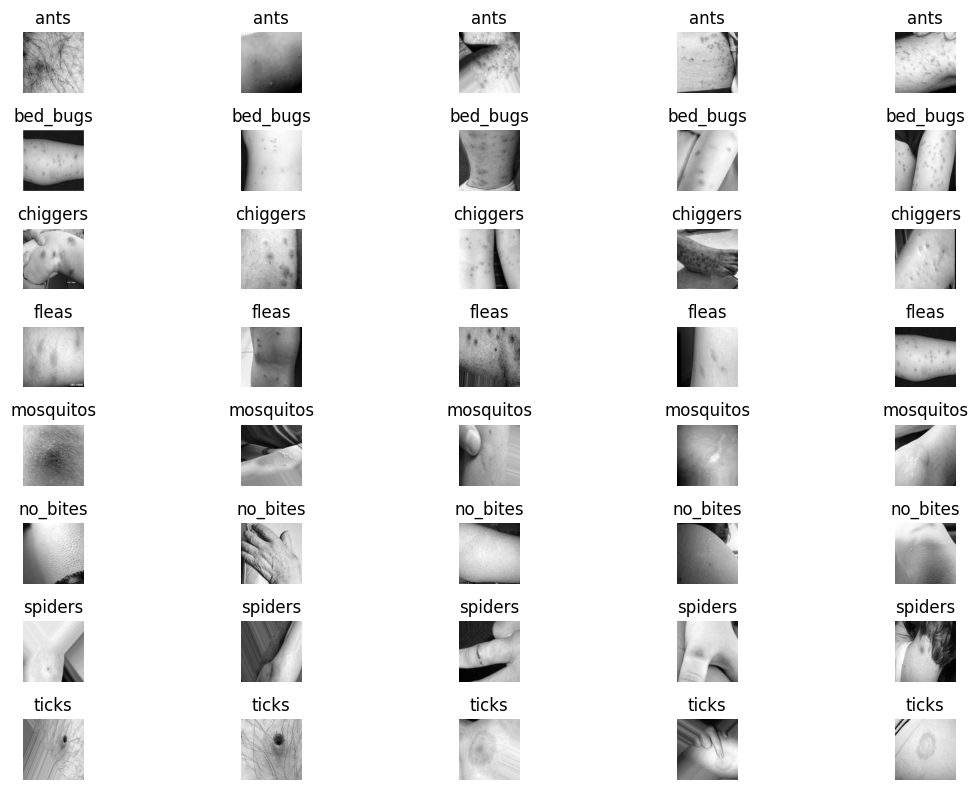

In [20]:
# Define a function to display sample images
def display_sample_images(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_name)[0]
        sample_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(images[idx], cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
class_names = np.unique(y_train)
display_sample_images(x_train, y_train, class_names)
